# Deep Learning

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Data import

In [3]:
traindata_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/889649d1bc273bf53967cb621a370205715b803b/dataset_day1/mnist_train.csv'
testdata_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/889649d1bc273bf53967cb621a370205715b803b/dataset_day1/mnist_test.csv'
train_data = pd.read_csv(traindata_url)
test_data = pd.read_csv(testdata_url)

## 데이터 확인

In [4]:
def plot_digit(data):
    image = data.reshape(28, 28) # 1d vector를 28*28 형태로 변경
    plt.imshow(image, cmap = matplotlib.cm.binary, 
               interpolation="nearest")
    plt.axis("off")

In [5]:
train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


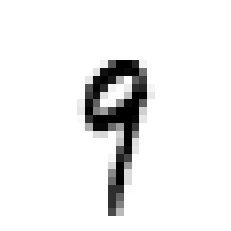

label:  9


In [6]:
index = 600
plot_digit(train_data.values[index, 1:])
plt.show()
print('label: ', train_data.values[index, 0])

In [7]:

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [8]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

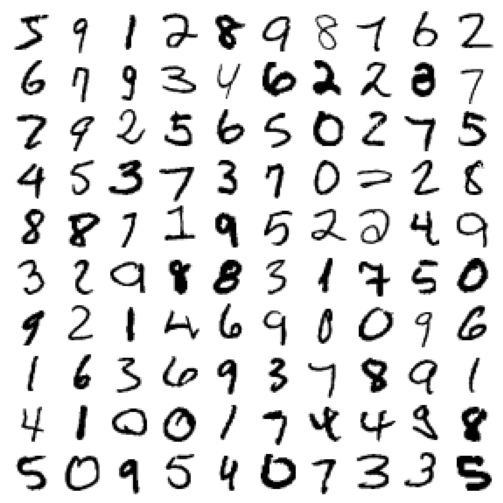

In [9]:

plt.figure(figsize=(9,9))
example_images = train_data.values[:60000:600, 1:]
plot_digits(example_images, images_per_row=10)
plt.show()

## Convert to 05 data

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train_data.label == 5)

train_data.label = le.transform(train_data.label == 5)
test_data.label = le.transform(test_data.label == 5)

## Deep learning - classification 모델

### Pytorch 모델에 입력하기 위한 데이터 변환

In [11]:
train_data = torch.from_numpy(train_data.values).float()
test_data = torch.from_numpy(test_data.values).float()

In [12]:
BATCH_SIZE = 15
epochs = 2
learning_rate = 0.001

In [13]:

data_loader = torch.utils.data.DataLoader(train_data,
                            batch_size=BATCH_SIZE, 
                            shuffle=True, 
                            num_workers=0)

### Deep learning 모델 정의 

In [14]:
class DNNModel(nn.Module):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.layer1 = nn.Linear(28 *28, 300)
        self.layer2 = nn.Linear(300, 2)
        self.relu = nn.ReLU()
    
        
    def forward(self, x):
        
        layers = nn.Sequential(self.layer1, 
                               self.relu,
                               self.layer2, 
                               self.relu
                               ).to(device)
        out = layers(x)
        return out
    
model = DNNModel()
model

DNNModel(
  (layer1): Linear(in_features=784, out_features=300, bias=True)
  (layer2): Linear(in_features=300, out_features=2, bias=True)
  (relu): ReLU()
)

In [15]:
class DNNModel(nn.Module):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.layer1 = nn.Linear(28 *28, 300)
        self.layer2 = nn.Linear(300, 100)
        self.layer3 = nn.Linear(100, 2)
        self.relu = nn.ReLU()
    
        
    def forward(self, x):
        
        layers = nn.Sequential(self.layer1, 
                               self.relu,
                               self.layer2, 
                               self.relu,
                               self.layer3).to(device)
        out = layers(x)
        return out
    
model = DNNModel()
model

DNNModel(
  (layer1): Linear(in_features=784, out_features=300, bias=True)
  (layer2): Linear(in_features=300, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=2, bias=True)
  (relu): ReLU()
)

### 학습 시작

GPU로 넘겨야 하는것
- model의 layer
- cost(criterion)
- data

#### torch.nn.CrossEntropyLoss() 함수에 대해
원래 cross entropy는 

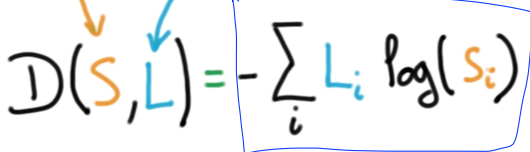

In [16]:
from IPython.display import Image
image_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/99785e9d01523e8bb6bf78d1220c1b020fa6c7c8/image_day1/cross_entropy.png'
Image(image_url)

pytorh.nn.CrossEntropyLoss() 는

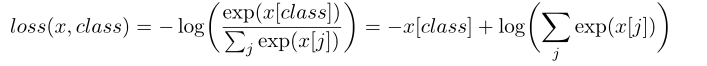

In [17]:
from IPython.display import Image
image_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/99785e9d01523e8bb6bf78d1220c1b020fa6c7c8/image_day1/torch_cross_entropy.png'
Image(image_url)

softmax와 label의 elemental wise 곱을하면 label이 0인 확률들은 모두 없어지게 되어 아래 수식이 가능  
따라서 class에는 one-hot encoding 되지 않은 값이 들어가야 함  
x에는 soft max를 거치지 않은 벡터가 들어감(CrossEntropyLoss()에 softmax가 포함)

In [18]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
for epoch in range(epochs):
    running_cost = 0.0

    for step, (batch_data) in enumerate(data_loader):
        batch_x = batch_data[:, 1:].view(-1, 28*28).to(device)
        batch_y = batch_data[:, 0].to(device).long()
        
        optimizer.zero_grad()
        
        outputs = model(batch_x)
        cost = criterion(outputs, batch_y)

        cost.backward()
        optimizer.step()
        
        running_cost += cost.item()
        if step % 200 == 199:
            print('[%d, %5d] cost: %.3f' % (epoch + 1, step + 1, running_cost / 200))
            running_cost = 0.0
            

[1,   200] cost: 0.447
[1,   400] cost: 0.087
[1,   600] cost: 0.070
[1,   800] cost: 0.058
[1,  1000] cost: 0.061
[1,  1200] cost: 0.056
[1,  1400] cost: 0.076
[1,  1600] cost: 0.050
[1,  1800] cost: 0.054
[1,  2000] cost: 0.038
[1,  2200] cost: 0.047
[1,  2400] cost: 0.047
[1,  2600] cost: 0.046
[1,  2800] cost: 0.052
[1,  3000] cost: 0.042
[1,  3200] cost: 0.050
[1,  3400] cost: 0.035
[1,  3600] cost: 0.051
[1,  3800] cost: 0.044
[1,  4000] cost: 0.025
[2,   200] cost: 0.044
[2,   400] cost: 0.028
[2,   600] cost: 0.041
[2,   800] cost: 0.037
[2,  1000] cost: 0.035
[2,  1200] cost: 0.021
[2,  1400] cost: 0.033
[2,  1600] cost: 0.035
[2,  1800] cost: 0.068
[2,  2000] cost: 0.032
[2,  2200] cost: 0.033
[2,  2400] cost: 0.030
[2,  2600] cost: 0.035
[2,  2800] cost: 0.024
[2,  3000] cost: 0.031
[2,  3200] cost: 0.033
[2,  3400] cost: 0.028
[2,  3600] cost: 0.031
[2,  3800] cost: 0.034
[2,  4000] cost: 0.019


## 정확도 판단

### Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [21]:
with torch.no_grad():
    X_test = test_data[:, 1:].view(-1, 28 * 28).float().to(device)
    y_test = test_data[:, 0].float()
    
    prediction = model(X_test).cpu()
    print(confusion_matrix(y_test, torch.argmax(prediction, 1)))
    print("==Precision==")
    print(precision_score(y_test, torch.argmax(prediction, 1), average=None))
    print(precision_score(y_test, torch.argmax(prediction, 1), average='weighted'))
    print("Recall")
    print(recall_score(y_test, torch.argmax(prediction, 1), average=None))
    print(recall_score(y_test, torch.argmax(prediction, 1), average='weighted'))

[[9050   58]
 [  32  860]]
==Precision==
[0.99647655 0.93681917]
0.9911551091747473
Recall
[0.99363197 0.96412556]
0.991
